In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wa-fnusec-telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
Telco_Customer_Churn = pd.read_csv(r"/kaggle/input/wa-fnusec-telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [34]:
Telco_Customer_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
Telco_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [36]:
Telco_Customer_Churn["TotalCharges"] = Telco_Customer_Churn["TotalCharges"].replace(" ","0")
Telco_Customer_Churn["TotalCharges"] = Telco_Customer_Churn["TotalCharges"].astype("float")

In [37]:
Telco_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
Telco_Customer_Churn.isnull().sum().sum()

0

In [39]:
Telco_Customer_Churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [40]:
Telco_Customer_Churn["customerID"].duplicated().sum()

0

In [41]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

Telco_Customer_Churn['SeniorCitizen'] = Telco_Customer_Churn["SeniorCitizen"].apply(conv)

In [ ]:
#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

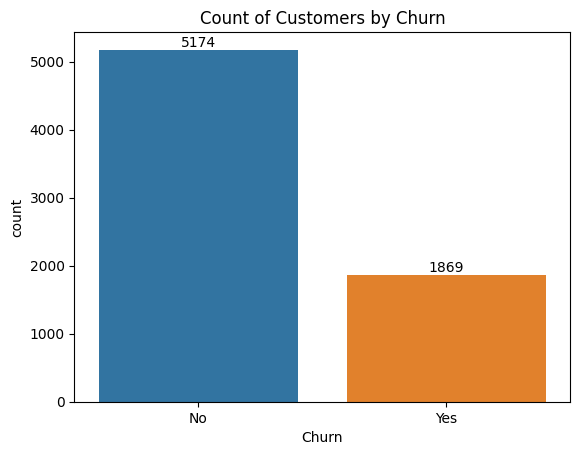

In [42]:
ax = sns.countplot(x = 'Churn', data = Telco_Customer_Churn)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

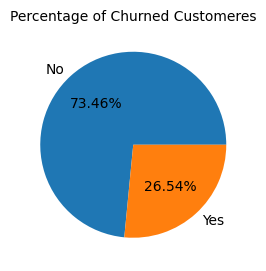

In [43]:
plt.figure(figsize = (3,4))
gb = Telco_Customer_Churn.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

In [ ]:
#from the given pie chart we can conclude that 26.54% of our customers have churned out. 
#not let's explore the reason behind it

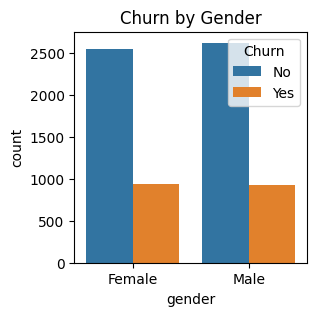

In [44]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = Telco_Customer_Churn, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

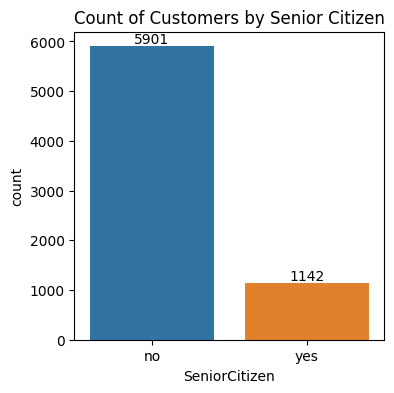

In [45]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = Telco_Customer_Churn)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

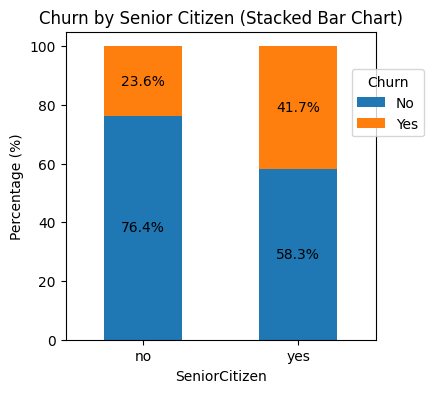

In [46]:
total_counts = Telco_Customer_Churn.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

In [ ]:
#comparative a greater pecentage of people in senior citizen category have churned

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

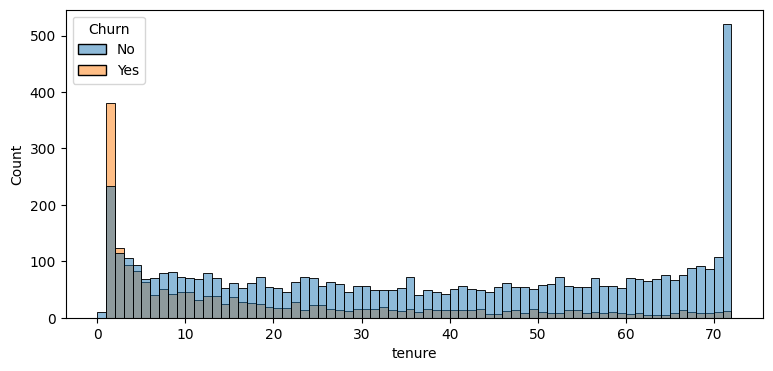

In [49]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = Telco_Customer_Churn, bins = 72, hue = "Churn")
plt.show()

In [ ]:
#people who have used our services for a long time have stayed and people who have used our sevices 
#1 or 2 months  have churned

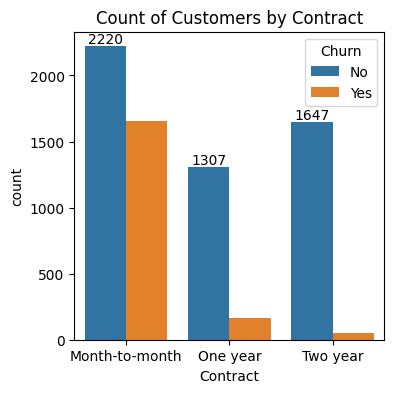

In [48]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = Telco_Customer_Churn, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [ ]:
#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [50]:
Telco_Customer_Churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

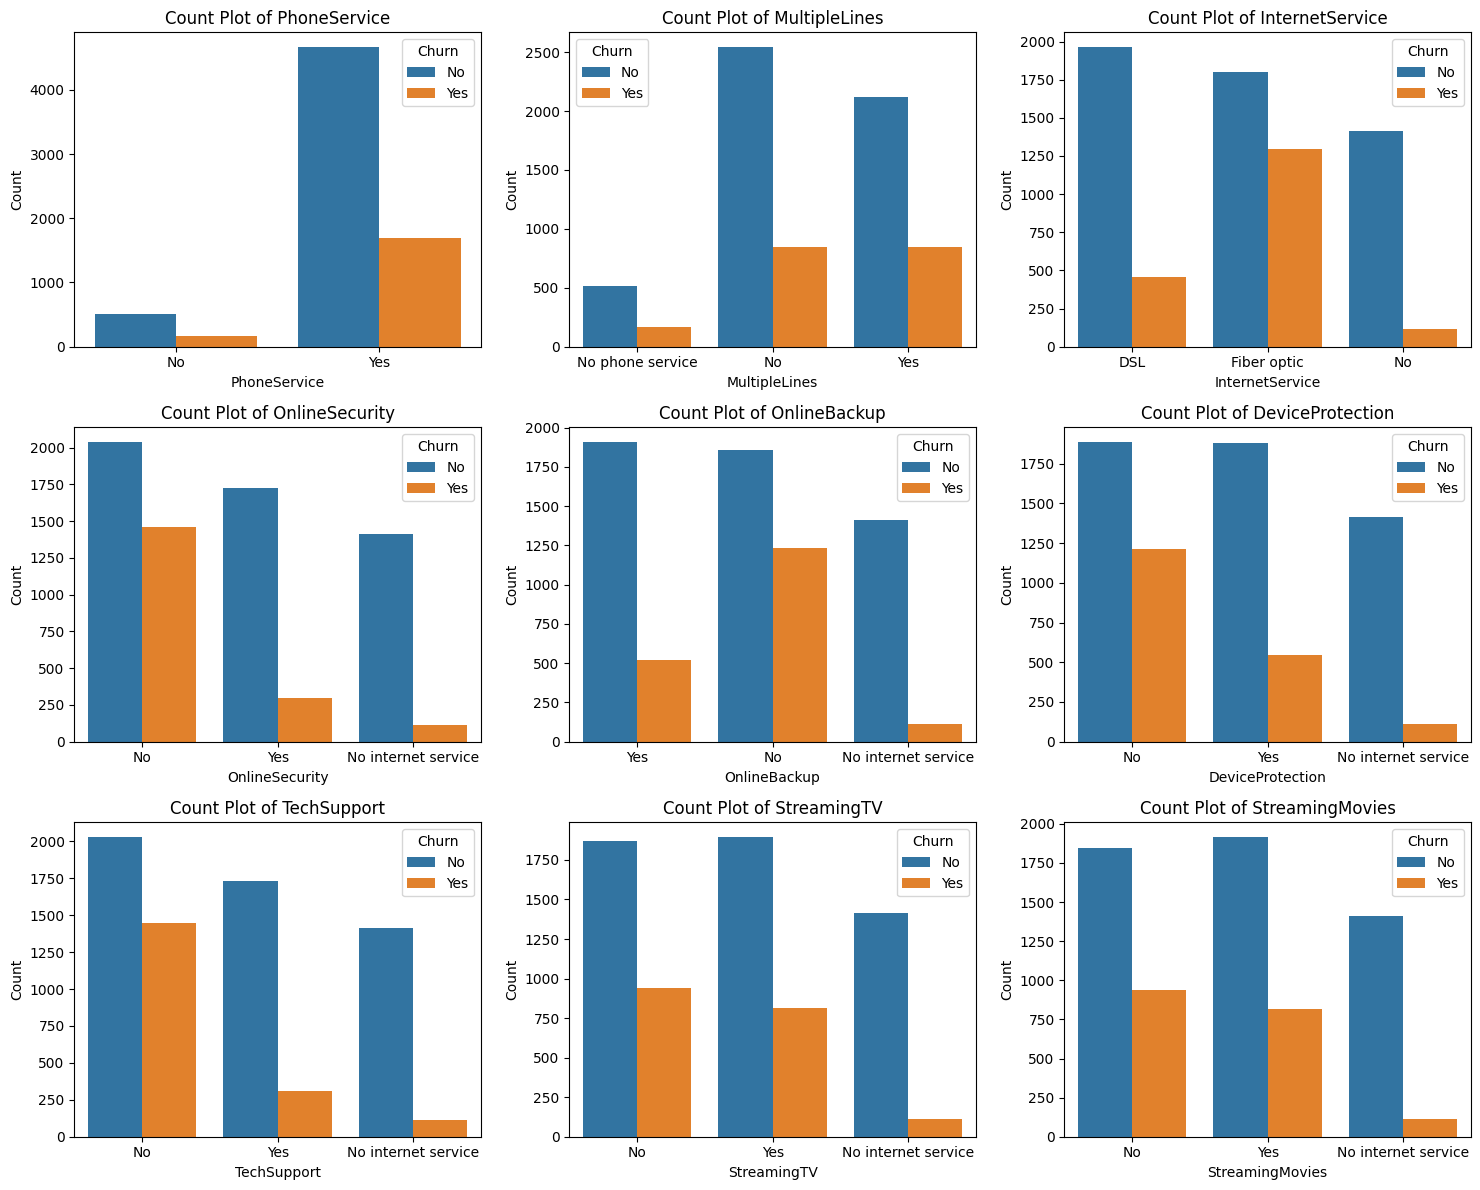

In [51]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=Telco_Customer_Churn, ax=axes[i], hue = Telco_Customer_Churn["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

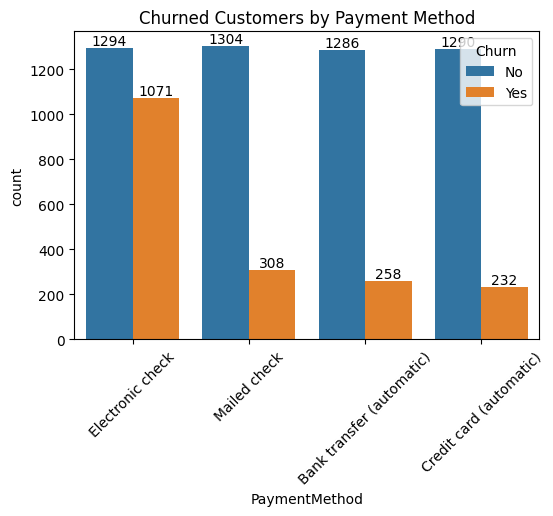

In [52]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = Telco_Customer_Churn, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#customer is likely to churn when he is using electronic check as a payment method. 

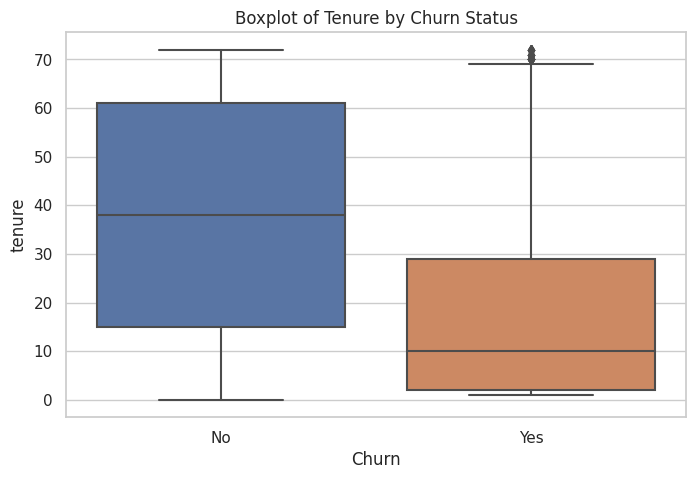

In [63]:

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=Telco_Customer_Churn)
plt.title("Boxplot of Tenure by Churn Status")
plt.show()


In [ ]:
#Draw a boxplot showing the distribution of tenure of customers based on their Churn status.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


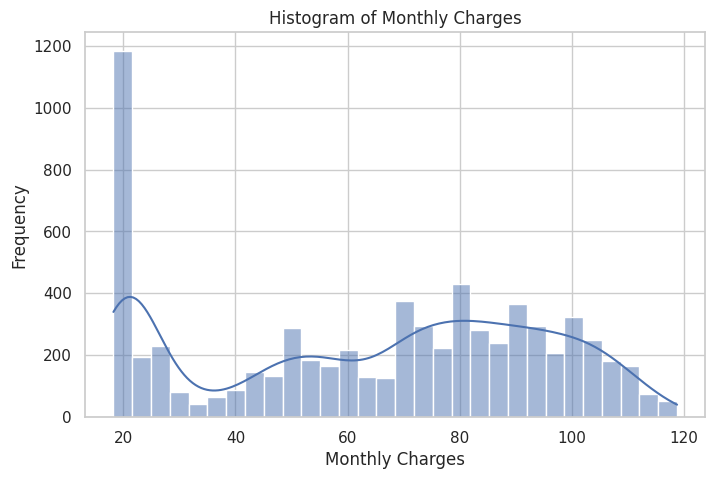

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(Telco_Customer_Churn["MonthlyCharges"], bins=30, kde=True)
plt.title("Histogram of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


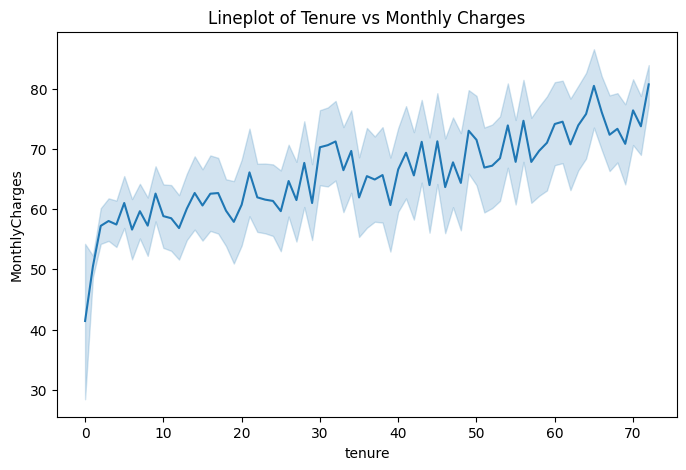

In [59]:
plt.figure(figsize=(8,5))
sns.lineplot(x="tenure", y="MonthlyCharges", data= Telco_Customer_Churn)
plt.title("Lineplot of Tenure vs Monthly Charges")
plt.show()


In [ ]:
#Plot a line graph showing the relationship between tenure and MonthlyCharges.

/tmp/ipykernel_36/936635014.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = Telco_Customer_Churn.groupby("tenure_group")["Churn"].value_counts().unstack(fill_value=0)
/tmp/ipykernel_36/936635014.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charges = Telco_Customer_Churn.groupby("tenure_group")["MonthlyCharges"].mean()
/tmp/ipykernel_36/936635014.py:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font

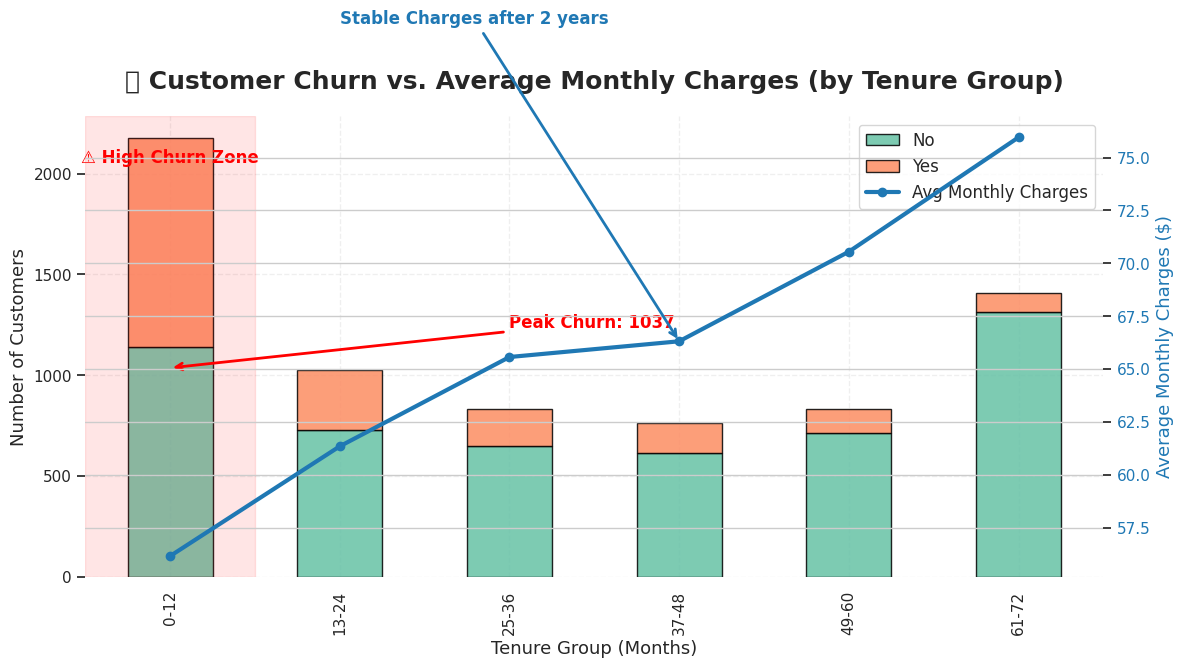

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Use Seaborn style
sns.set_theme(style="whitegrid")

# Create tenure groups
Telco_Customer_Churn["tenure_group"] = pd.cut(
    Telco_Customer_Churn["tenure"], 
    bins=[0, 12, 24, 36, 48, 60, 72], 
    labels=["0-12", "13-24", "25-36", "37-48", "49-60", "61-72"]
)

# Grouped data
churn_counts = Telco_Customer_Churn.groupby("tenure_group")["Churn"].value_counts().unstack(fill_value=0)
avg_charges = Telco_Customer_Churn.groupby("tenure_group")["MonthlyCharges"].mean()

# ---- Plot ----
fig, ax = plt.subplots(figsize=(12,7))

# Barplot: Churn counts
churn_counts.plot(
    kind="bar", stacked=True, ax=ax, 
    color=["#66c2a5", "#fc8d62"], edgecolor="black", alpha=0.85
)
ax.set_ylabel("Number of Customers", fontsize=13)
ax.set_xlabel("Tenure Group (Months)", fontsize=13)
ax.set_title("📊 Customer Churn vs. Average Monthly Charges (by Tenure Group)", 
             fontsize=18, fontweight="bold", pad=20)

# Secondary Y-axis: Avg Monthly Charges
ax2 = ax.twinx()
ax2.plot(
    avg_charges.index.astype(str),
    avg_charges.values,
    color="#1f78b4", marker="o", linewidth=3, label="Avg Monthly Charges"
)
ax2.set_ylabel("Average Monthly Charges ($)", fontsize=13, color="#1f78b4")
ax2.tick_params(axis="y", labelcolor="#1f78b4")

# ---- Aesthetics ----
ax.grid(alpha=0.3, linestyle="--")
sns.despine(left=True, bottom=True)

# Shade high-churn (0–12 months) region
ax.axvspan(-0.5, 0.5, color="red", alpha=0.1)
ax.text(
    0, ax.get_ylim()[1]*0.9, "⚠️ High Churn Zone", 
    color="red", fontsize=12, fontweight="bold", ha="center"
)

# Annotation: highest churn group
high_churn_group = churn_counts["Yes"].idxmax()
high_churn_val = churn_counts["Yes"].max()
ax.annotate(
    f"Peak Churn: {high_churn_val}", 
    xy=(list(churn_counts.index).index(high_churn_group), high_churn_val),
    xytext=(2, high_churn_val+200),
    arrowprops=dict(arrowstyle="->", color="red", lw=2),
    fontsize=12, color="red", fontweight="bold"
)

# Annotation: steady charges
ax2.annotate(
    "Stable Charges after 2 years", 
    xy=(3, avg_charges.values[3]),
    xytext=(1, avg_charges.values[3]+15),
    arrowprops=dict(arrowstyle="->", color="#1f78b4", lw=2),
    fontsize=12, color="#1f78b4", fontweight="bold"
)

# Legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, fontsize=12, loc="upper right", frameon=True)

plt.tight_layout()
plt.show()


In [ ]:
# ✔ Modern Seaborn style + custom colors
# ✔ Annotations with arrows
# ✔ Shaded regions for critical tenure groups (e.g., new customers in 0–12 months where churn is highest)
# ✔ Gridlines, bold titles, clean layout
# ✔ Combined stacked bar + dual axis line